In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# True probabilities of success for each arm
true_probs = np.random.rand(n_arms)

In [48]:
true_probs=np.array([0.76655827, 0.06028664, 0.561102  , 0.49072993, 0.33120306])

In [49]:
true_probs=np.array([0.06028664, 0.561102  , 0.49072993, 0.33120306, 0.76655827])

In [50]:
# Number of arms and rounds
n_arms_range = [2,5]
n_rounds = 1000
cumulative_rewards=[]

for n_arms in n_arms_range:
    # Variables to keep track of successes and failures for each arm
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)

    # To store the rewards obtained
    rewards = np.zeros(n_rounds)

    for t in range(n_rounds):
        # Sample from the beta distribution for each arm
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        
        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        
        # Simulate pulling the chosen arm
        reward = np.random.rand() < true_probs[chosen_arm]
        rewards[t] = reward
        
        # Update successes and failures based on the outcome
        if reward:
            successes[chosen_arm] += 1
        else:
            failures[chosen_arm] += 1

    # Calculate cumulative rewards
    cumulative_rewards.append(np.cumsum(rewards)/n_rounds)

    # Print the estimated probabilities for each arm
    print('The number of arms:', n_arms)
    estimated_probs = successes / (successes + failures)
    print("True probabilities:", true_probs)
    print("Estimated probabilities:", estimated_probs)

The number of arms: 2
True probabilities: [0.06028664 0.561102   0.49072993 0.33120306 0.76655827]
Estimated probabilities: [0.09090909 0.58543984]
The number of arms: 5
True probabilities: [0.06028664 0.561102   0.49072993 0.33120306 0.76655827]
Estimated probabilities: [0.         0.67105263 0.42857143 0.         0.7751938 ]


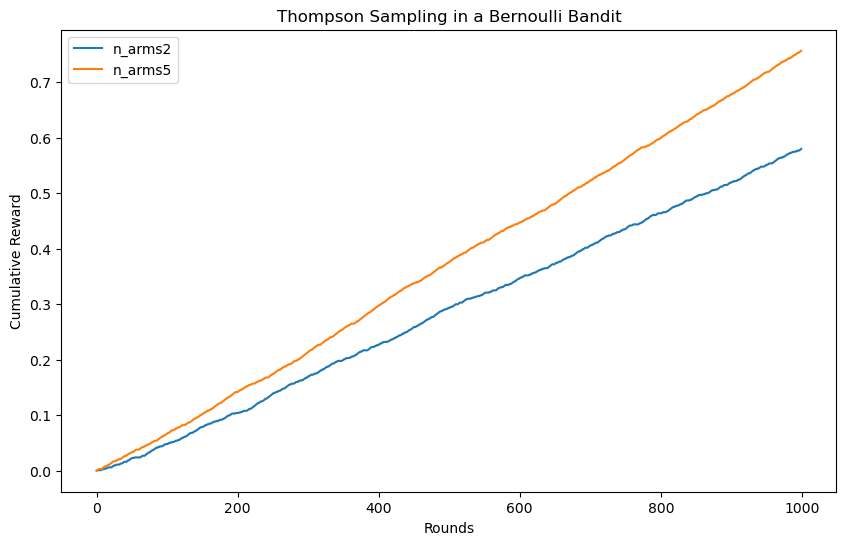

In [51]:
# Plot the results
plt.figure(figsize=(10, 6))
i=0
for n_arms in n_arms_range:
    plt.plot(cumulative_rewards[i], label="n_arms"+str(n_arms))
    i+=1
# plt.axhline(y=np.max(true_probs) * np.arange(1, n_rounds + 1), color='r', linestyle='--', label="Optimal")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("Thompson Sampling in a Bernoulli Bandit")
plt.legend()
plt.show()


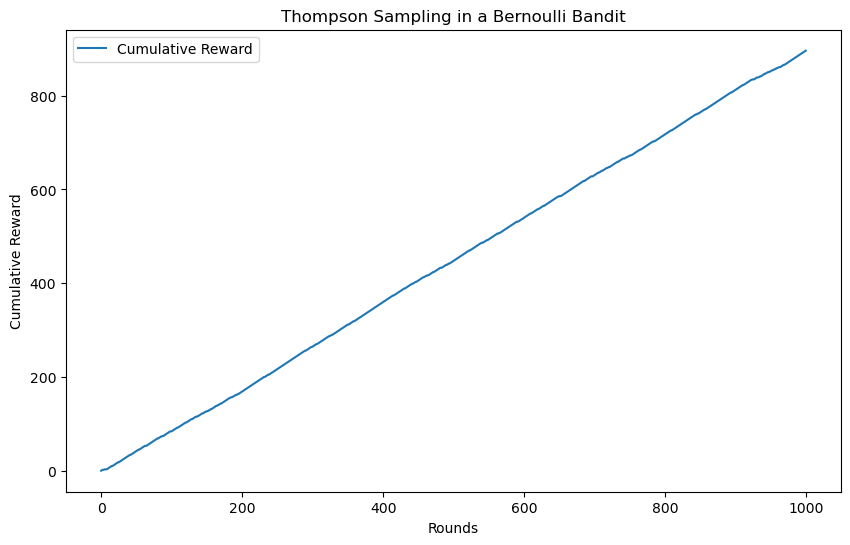

True probabilities: [0.90416214 0.2354505  0.00611408 0.69334396 0.26226886]
Estimated probabilities: [0.90120968 0.25      ]


In [26]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Cumulative Reward")
# plt.axhline(y=np.max(true_probs) * np.arange(1, n_rounds + 1), color='r', linestyle='--', label="Optimal")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("Thompson Sampling in a Bernoulli Bandit")
plt.legend()
plt.show()

# Print the estimated probabilities for each arm
estimated_probs = successes / (successes + failures)
print("True probabilities:", true_probs)
print("Estimated probabilities:", estimated_probs)